<a href="https://colab.research.google.com/github/IvanSalinas2000/Aprendizaje-automatico/blob/main/Tareas/Tarea6/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('/content/diamantesCLEAN.csv')



In [2]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('price', axis=1)
y = df['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (opcional, pero recomendable)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [3]:
# Crear y entrenar el modelo
modelo = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular las métricas de error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


MAE: 271.9742232464037
MSE: 298375.6294800233
RMSE: 546.2377041911545
R^2: 0.9803541285503744


In [ ]:
# Guardar los resultados en un archivo
resultados = pd.DataFrame({'y_real': y_test, 'y_pred': y_pred})
resultados.to_csv('resultados_prediccion.csv', index=False)

# Guardar el modelo entrenado
joblib.dump(modelo, 'modelo_xgboost.pkl')


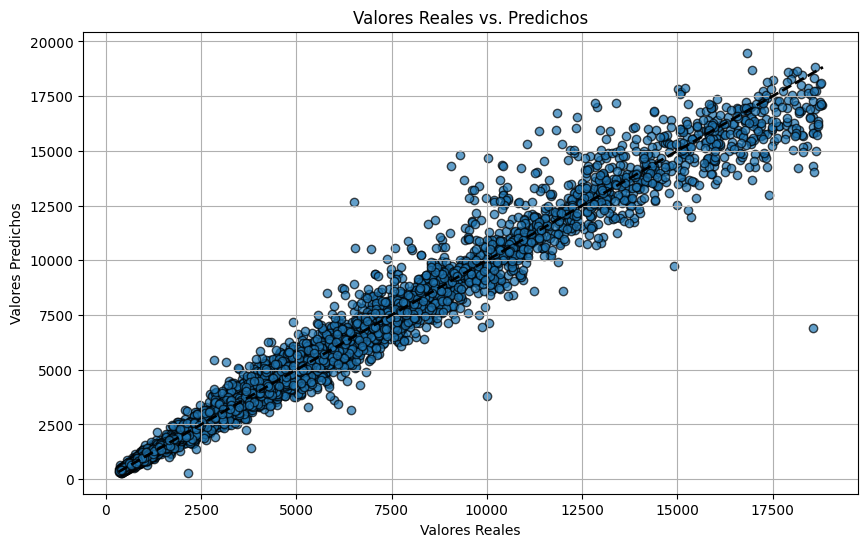

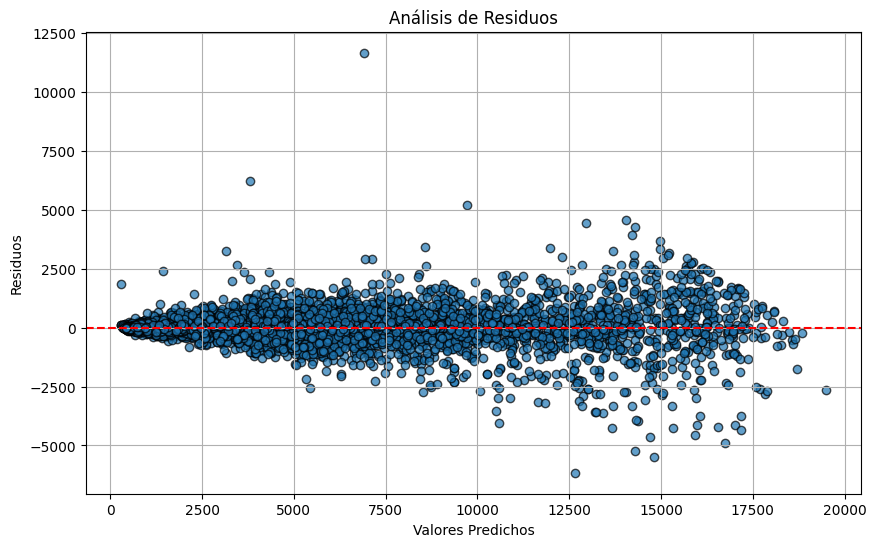

In [6]:
# Crear gráficos para analizar los resultados

# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.grid(True)
plt.savefig('valores_reales_vs_predichos.png')
plt.show()

# Gráfico de los residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.grid(True)
plt.savefig('analisis_residuos.png')
plt.show()